# Image Preprocessing

In [42]:
pwd


'/home/wsuser/work'

In [43]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1luKH6odwgL64J_imfwZ92uWTIEdmQgqio04U6KSzhrp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationpoweredbyaif-donotdelete-pr-txswq4p8o2phjc'
object_key = 'conversation engine for deaf and dumb.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [44]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [45]:
ls


Dataset/


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [60]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [61]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [62]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset/training_set",target_size=(64,64),
                                          class_mode="categorical",batch_size=30)

Found 15750 images belonging to 9 classes.


In [63]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset/test_set",target_size=(64,64),
                                                            class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


# Model Building

In [64]:
model=Sequential()

In [65]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
#No of feature detectors, size of feature detector, image size, activation function

**add the Pooling Layer**

In [66]:
model.add(MaxPooling2D(pool_size=(2,2)))


**Adding the flatten Layer**

In [67]:
model.add(Flatten())

**Adding the Dense Layer**

In [68]:
model.add(Dense(200,activation='relu'))


In [69]:
model.add(Dense(200,activation='relu'))

In [70]:
model.add(Dense(9,activation="softmax"))

**Compile the model**

In [71]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [72]:
len(x_train)

525

In [73]:
len(x_test)

75

In [74]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**Fit and Save the Model**

In [75]:
model.fit(x_train,epochs=9,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/9
525/525 [==============================] - 81s 153ms/step - loss: 0.2869 - accuracy: 0.9035 - val_loss: 0.2433 - val_accuracy: 0.9511
Epoch 2/9
525/525 [==============================] - 79s 150ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.1269 - val_accuracy: 0.9764
Epoch 3/9
525/525 [==============================] - 81s 154ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.1501 - val_accuracy: 0.9756
Epoch 4/9
525/525 [==============================] - 78s 149ms/step - loss: 0.0282 - accuracy: 0.9906 - val_loss: 0.2076 - val_accuracy: 0.9702
Epoch 5/9
525/525 [==============================] - 80s 151ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.2317 - val_accuracy: 0.9787
Epoch 6/9
525/525 [==============================] - 79s 150ms/step - loss: 0.0227 - accuracy: 0.9940 - val_loss: 0.2584 - val_accuracy: 0.9711
Epoch 7/9
525/525 [==============================] - 80s 151ms/step - loss: 0.0169 - accuracy: 0.9950 - val_loss: 0.1855 - val_accuracy:

In [76]:
model.save('signlanguageasl.h5')

In [77]:
!pip install watson_machine_learning_client

     |████████████████████████████████| 538 kB 10.9 MB/s eta 0:00:01


In [78]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "8BHLfgyhaWkUcepYAr4BCvJI1BFlWppbdHrvRE8w1D99"
}
client = APIClient(url_credentials)

In [79]:
client

In [80]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [81]:
space_uid = guid_from_space_name(client, 'sign_language')
print("space UID = " + space_uid)

space UID = 1d7c9d04-944f-447d-a52a-8e3f7c30e562


In [82]:
client.set.default_space(space_uid)

'SUCCESS'

In [83]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [84]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [85]:
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [86]:
ls


Dataset/  signlanguageasl.h5


In [87]:
!tar -zcvf image-Classification-model.tgz signlanguageasl.h5 

signlanguageasl.h5


In [89]:
model_details = client.repository.store_model(model='image-Classification-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:'CNN',
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})


In [90]:
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [91]:
model_id

'38f4a808-0736-40fa-82dc-43e9a817b59e'

In [92]:
client.repository.download(model_id, 'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [93]:
ls

Dataset/  image-Classification-model.tgz  my_model.tar.gz  signlanguageasl.h5


# Test The Model

In [23]:
from keras.models import load_model
import numpy as np
import h5py
import cv2



In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [29]:
model = load_model(r'C:\Users\hemam\Downloads\signlanguageasl.h5')

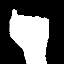

In [32]:
img =image.load_img(r'C:\Users\hemam\Downloads\conversation engine for deaf and dumb\Dataset\test_set\A\55.png',target_size = (64,64))
img


In [33]:
type(img)

PIL.Image.Image

In [34]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [35]:
x.shape

(64, 64, 3)

In [36]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [37]:
pred_prob = model.predict(x)

1/1 [==============================] - 0s 390ms/step


In [38]:
pred_prob

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred_prob.argmax(axis=1)[0]

In [40]:
pred_id

0

In [41]:
print("the alphabet is  ",str(class_name[pred_id]))

the alphabet is   A
